**librarys**

In [106]:
# fault_transient_target’- the first 720 - overexcitation, next 2520 - magnetizing inrush, next 2520 -sympathetic inrush, and next 7920 are external faults.

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
import seaborn as sns
# import plotly.express as px
import random

import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
# from xgboost import XGBClassifier

import keras
import tensorflow as tf
from tensorflow.keras import utils

rcParams = {'figure.figsize': (15 ,8)}

sns.set(rc=rcParams)
sns.set(font_scale=1.6)

faults_type_dic = {1: "superexcitação", 2: "magntetização inrush", 3: "inrush simpático", 4: "faltas externas"}

**1- Business Problem**

O problema de negócio consise na classificação de tipo da falta e sua localizacao com ocorrência em um transformador de deslocamento de Fase indireto Assimétrico (ISPST)


Transformadores de Deslocamento de Fase (PSTs) foram introduzidos pela primeira vez em 1930 para resolver problemas de fluxo de energia. Desde então tem sido um componente integral do sistema de energia. Os PSTs são usados para obter a diferença de fase necessária entre a tensão final de envio e tensão final de recepção. Eles podem controlar o fluxo de energia ativa em ramos de redes em malha e conectar redes independentes em um único sistema de energia de linha de transmissão alterando o ângulo de fase. Os PSTs inserem uma variável de tensão de quadratura para a tensão de fase da fonte que é obtida das tensões fase-fase das duas fases restantes e, realizam assim, a mudança de fase necessária (Shailendra Kumar Bhasker, diferencial protection). O controle do fluxo de potência utilizado pelo PST é dado por (1)

p=  (|Vs||Vl|)/Xt  sin⁡〖(δ ± Δθ)〗	(1)

Existem diferentes tipos de PSTs, de acordo com sua construção como discutido em [1]. O PST indireto simétrico (ISPST) é amplamente utilizado devido à sua construção simples, como mostrado na Fig. 1. Este equipamento auxilia na utilização de linhas de transmissão de energia que melhoram o desempenho e eficiência operacional do sistema



Quanto ao tipo os transientes podem ser de superexcitação, Magnetizacao inrush, sympathetic inrush, External Faults.

Quanto a localização da Falta pode ser em sua unidade de serie ou excitacao

**2-Coleta**

The files - ’fault_location_pha’, ’fault_location_phb’, and ’fault_location_phc’ have phase a,b,c differential currents for 46872 cases. Each row has 167 samples (one cycle).

 In fault_location_target’- the first 33480 are faults in series unit, next 13392 are faults in exciting unit.

In [108]:
! pwd

/c/Users/felipe/Desktop/Github/machine-learning-projects/Fault Transformers Classification Problem


## Causa/Tipo da Falta (do Transiente)

In [109]:
# The files - ’transients_pha’, ’transients_phb’, and ’transients_phc’ have phase a,b,c differential currents for 13680 cases
trans_feats_df = pd.read_csv("data/transients_pha.txt", names=np.arange(0, 167))
trans_target_df = pd.read_csv("data/transients_target.csv", names=["type"], header=0)
trans_df = pd.concat([trans_feats_df, trans_target_df], axis=1)
trans_df.head()

,0,1,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,type
0,-0.620150,-0.614980,-0.609550,-0.602650,-0.593650,-0.582170,-0.567680,-0.549090,-0.525180,-0.495690,...,-0.85022,-0.83994,-0.82959,-0.81805,-0.80538,-0.79217,-0.77910,-0.76676,-0.75551,1
1,-0.084167,-0.083597,-0.083507,-0.083867,-0.084472,-0.085083,-0.085544,-0.085791,-0.085759,-0.085396,...,-0.95513,-0.79581,-0.63055,-0.46670,-0.32048,-0.21682,-0.16169,-0.13556,-0.12272,1
2,-0.180870,-0.183060,-0.184730,-0.185710,-0.185890,-0.185150,-0.183310,-0.180180,-0.175550,-0.169280,...,-0.33056,-0.27414,-0.24866,-0.23736,-0.23243,-0.23059,-0.23033,-0.23087,-0.23177,1
3,-0.303210,-0.301000,-0.296970,-0.290780,-0.281910,-0.269880,-0.254940,-0.238510,-0.222560,-0.208400,...,-0.37854,-0.37843,-0.37871,-0.37914,-0.37960,-0.37995,-0.37995,-0.37920,-0.37719,1
4,-0.395820,-0.377150,-0.353670,-0.327150,-0.300740,-0.277320,-0.258200,-0.243310,-0.231820,-0.222670,...,-0.54949,-0.54669,-0.54354,-0.53948,-0.53383,-0.52625,-0.51650,-0.50430,-0.48960,1


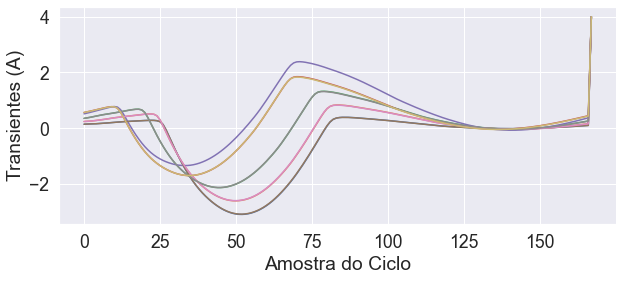

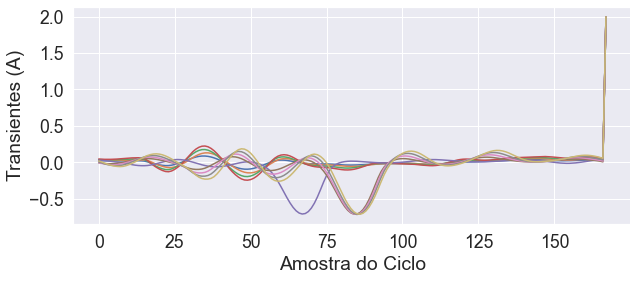

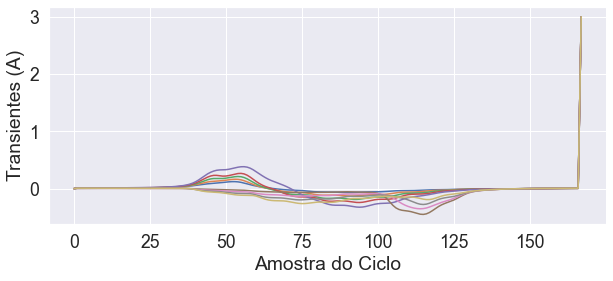

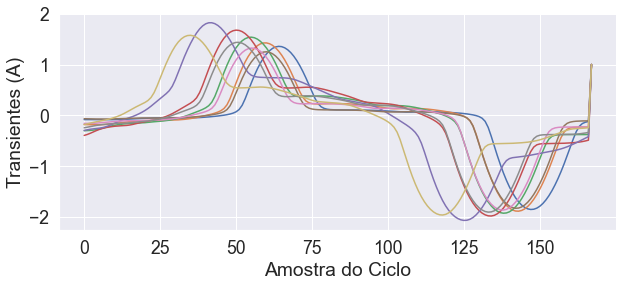

In [110]:
# fault_transient_target’- the first 720 - overexcitation, next 2520 - magnetizing inrush, next 2520 -sympathetic inrush, and next 7920 are external faults.
# overexcitation ocorre quando o regulador coloca muita corrente de excitacaao
# Magnetizacao inrush - When a transformer is energized, a transient current, known as magnetizing inrush current, generally flows for a short period of time until normal flux conditions are established
# sympathetic inrush
# External Faults
# Para cada tipo de falta plota a diferenca entre as correntes
types = trans_df.type.value_counts().index
for type in types:
    fig, ax = plt.subplots(1, figsize=(10,4))
    trans = trans_df.copy()
    for i in range(1,10):
        ax = trans[trans.type == type].iloc[i].plot()
#         ax.set_title(type)
        ax.set_ylabel("Transientes (A)")
        ax.set_xlabel("Amostra do Ciclo")

**Feature Enginnerging**
Nao vamos passar um vetor de 167 feature para o nosso modelo, nao eh necessario e pode deixar a performance e entendimento
pior. Vamos para isso entender caracteristicas especificas de cada tipo de corrente. Por isso que eh importante, antes de
jogar as features para o modelo olhar os dados e entender quais sao as caracteristicas importante. Quanto mais features
discriminantes tiver, melhor sera a sua performance
https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114
-- Transformar em bins
Aqui vamos pegar o valor:
-- Maximo, minimo, medio, mediano de cada ciclo
-- Valor medio do bin (dividindo a serie em 3 e pegando o valor medio de cada periodo dividido)


## Preprocess

In [111]:
df = trans_df.copy()

In [112]:
df.shape[0]

13680

In [113]:
df.isnull().sum().sum()

0

In [114]:
# Metricas Gerais
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,type
count,13680.000000,13680.000000,13680.000000,13680.000000,13680.000000,13680.000000,13680.000000,13680.000000,13680.000000,13680.000000,...,13680.000000,13680.000000,13680.000000,13680.000000,13680.000000,13680.000000,13680.000000,13680.000000,13680.000000,13680.000000
mean,-0.029871,-0.032191,-0.034346,-0.036408,-0.038385,-0.040226,-0.041884,-0.043375,-0.044769,-0.046135,...,-0.011069,-0.011868,-0.012781,-0.013803,-0.014937,-0.016253,-0.017865,-0.019771,-0.021873,3.289474
std,0.690515,0.720936,0.751683,0.783733,0.815728,0.845441,0.873108,0.902267,0.935600,0.971820,...,0.576116,0.584985,0.595401,0.607304,0.620667,0.635547,0.652019,0.669987,0.689188,0.943374
min,-3.990600,-4.013300,-4.025800,-4.019900,-3.997000,-4.096600,-4.275500,-4.441300,-4.593800,-4.732200,...,-3.922000,-3.945800,-3.987200,-4.026000,-4.055800,-4.074100,-4.095700,-4.142500,-4.174600,1.000000
25%,-0.184870,-0.229515,-0.240382,-0.254085,-0.261600,-0.270072,-0.284110,-0.293555,-0.305935,-0.317153,...,-0.122777,-0.126240,-0.128852,-0.131435,-0.132770,-0.138430,-0.145765,-0.151890,-0.157387,3.000000
50%,-0.000084,-0.001940,-0.002257,-0.002381,-0.002698,-0.002507,-0.001981,-0.001936,-0.001873,-0.001651,...,0.000165,0.000188,0.000003,-0.000088,-0.000364,-0.000423,-0.000356,-0.000519,-0.000686,4.000000
75%,0.138472,0.178925,0.193275,0.203507,0.210590,0.214882,0.220800,0.224697,0.228950,0.233900,...,0.117390,0.118555,0.119875,0.121883,0.121045,0.118457,0.122420,0.128465,0.132378,4.000000
max,4.007100,4.020100,4.014800,3.992600,3.960200,3.921400,3.871300,3.869100,4.095600,4.322700,...,3.915600,3.955100,3.998300,4.034200,4.058100,4.085300,4.133200,4.166500,4.187800,4.000000


In [115]:
# Apesar de duplicados, manter pois podem ser condicoes de corrente iguais em ciclos diferentes. Aqui se tiverem
# menos de 1% da base manter
print(df[df.duplicated()].shape[0])

169


In [116]:
df.type.unique()

array([1, 2, 3, 4], dtype=int64)

## Feature Enginnering

Como pode ser visto, as curvas de corrente tem caracteristicas especificas em cada localizacao e tipo de falta.Dessa forma, para conseguir separar cada caso e tipo, vamos procurar por caracteristicas especificas em cada caso
que façam com o modelo consiga separa-los e identificar cada um. Vamos utilizar nesse caso algumas features:

- PCA (Analise de Componentes Principais - Iremos agrupar as features em componentes que tenham maior correlação entre si) - O PCA é uma tecnica estatistica. - Deprecated
- **Características Estatísticas: Média, mediana, máximo / minimo (amplitude de pico e vale) - Primeira Tentativa**
- Analise wavelet (análise de frequência_ - - Deprecated
- **FFT - Transformada Rápida de Fourier - Segunda Tentativa**
- Autoencoder (compressão de sinal) - - Deprecated

**Variaveis Estatistica** - Meidia, mediana, desvio padrao, maximo e minimo

In [117]:
# # Testando Assimetria
# for type in trans_df.type.unique():
#     fig, ax = plt.subplots()
#     trans_df[trans_df.type == type].iloc[0].hist(ax=ax)
#     print(trans_df[trans_df.type == type].iloc[0].skew())

# # Testando Kurtosis
# for type in trans_df.type.unique():
#     fig, ax = plt.subplots()
#     trans_df[trans_df.type == type].iloc[0].hist(ax=ax)
#     print(trans_df[trans_df.type == type].iloc[0].kurtosis())

In [118]:
features  = range(0, 167)

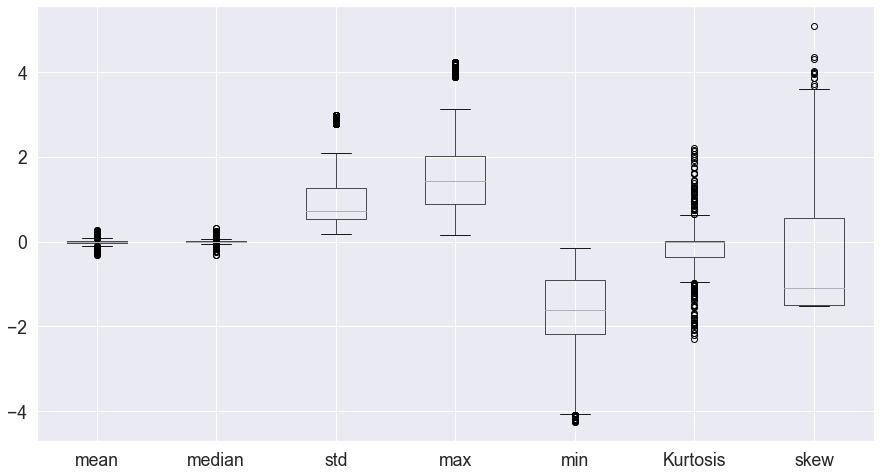

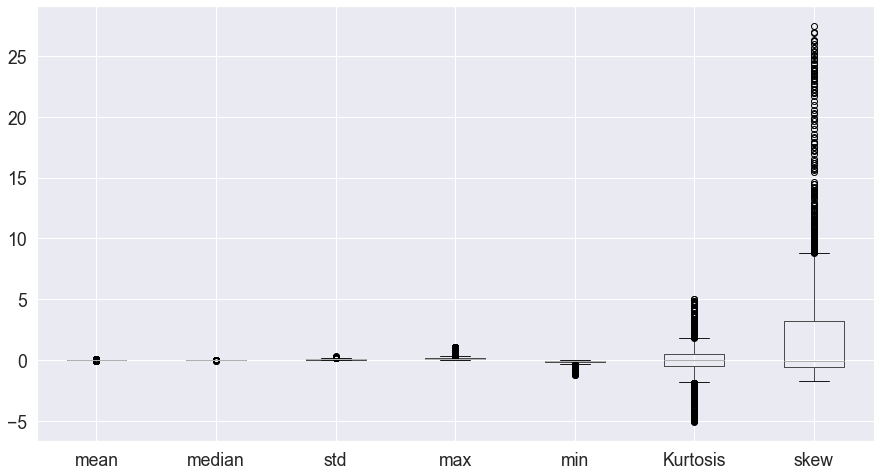

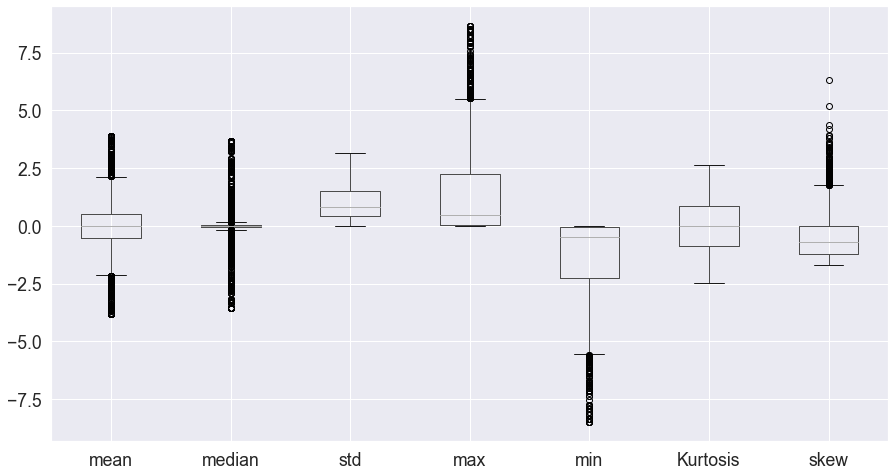

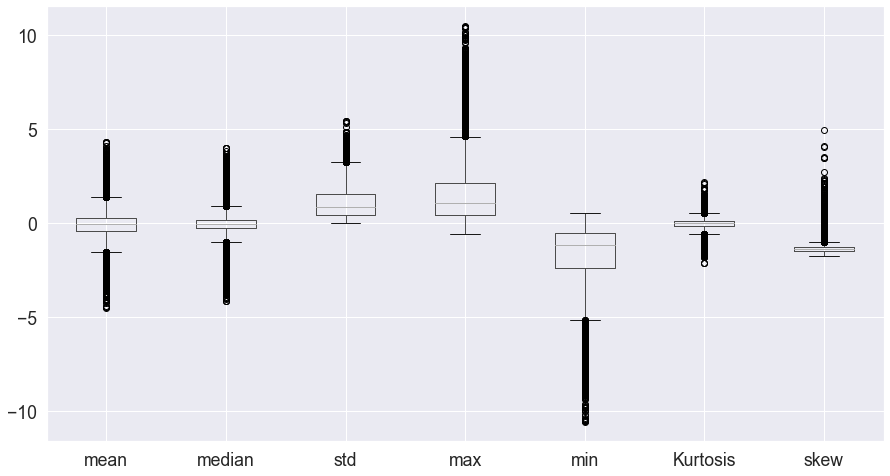

In [119]:
df["mean"] = df[features].mean(axis=1) # Axis 1 - colunas - 0 - linhas
df ["median"] = df[features].median(axis=1)
df ["std"] = df[features].std(axis=1)
df ["max"] = df[features].max(axis=1)
df ["min"] = df[features].min(axis=1)
# A Curtose ou achatamento também é uma medida que nos ajuda a dar forma à distribuição dos dados.
# A curtose, diferente da assimetria, tenta capturar em uma medida a forma das caudas da distribuição.
df ["Kurtosis"] = df[features].skew(axis=1)
df ["skew"] = df[features].kurtosis(axis=1)



for tp in df.type.unique():
    fig, ax = plt.subplots(1)
    df[df.type == tp][["mean", "median", "std", "max", "min", "Kurtosis", "skew"]].boxplot(ax=ax)

**FFT analysis - Transformada rapida de fourier**

O método de Fourier é uma técnica para o estudo de sinais que tem sido muito utilizada na ciência e na engenharia. A técnica consiste na transformação de um domínio em um outro domínio, em que muitas características do sinal analisado são revelados. O domínio transformado é denominado domínio espectral ou frequencial, enquanto o domínio original da função é chamado de domínio temporal ou domínio espacial.

Na teoria de Fourier incluem-se a transformada de Fourier e a série de Fourier. A série de Fourier é usada para analisar funções que são periódicas enquanto a transformada de Fourier é usada para representar funções aperiódicas. A transformada de Fourier pode ser vista como uma extensão da série de Fourier em que uma função aperiódica é considerada periódica no intervalo [-L∕2,L∕2], com L tendendo a infinito. Maiores detalhes podem ser obtidos em [12].

Como a transformada wavelet é muito similar à transformada de Fourier em muitos aspectos, nesta seção faz-se uma breve revisão desta transformada.

A transformada de Fourier de um sinal f, de uma variável real t, é definida pela integral



Performs a continuous wavelet transform on data, using the wavelet function. A CWT performs a convolution with data using the wavelet function, which is characterized by a width parameter and length parameter

A better approach for analyzing signals with a dynamical frequency spectrum is the Wavelet Transform. The Wavelet Transform has a high resolution in both the frequency- and the time-domain. It does not only tell us which frequencies are present in a signal, 

<AxesSubplot:>

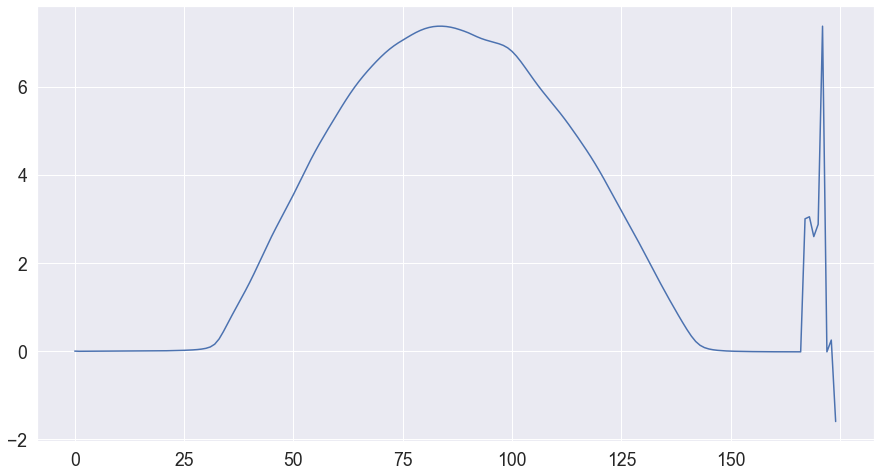

In [120]:
df.iloc[4000].plot()

https://www.oreilly.com/library/view/elegant-scipy/9781491922927/ch04.html

In [121]:
# Use the fast fourier to get the max frequency on signal

C:\Users\felipe\miniconda3\envs\data_science\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\felipe\miniconda3\envs\data_science\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


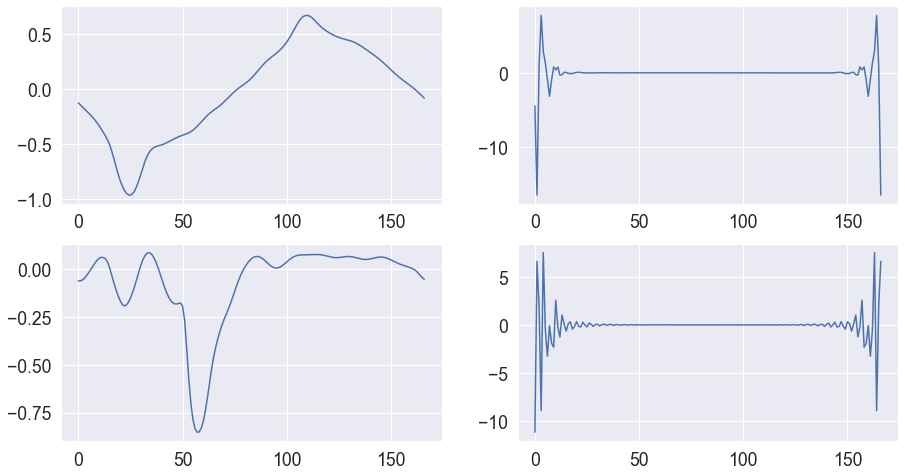

In [122]:
x_1 = df[features][df.type == 1].iloc[random.randint(0, 100)].values
x_2 = df[features][df.type == 2].iloc[random.randint(0, 100)].values
fft_x_1 = np.fft.fft(x_1)
fft_x_2 = np.fft.fft(x_2)

fig, ax = plt.subplots(2, 2)
ax[0][0].plot(x_1)
ax[0][1].plot(fft_x_1)
ax[1][0].plot(x_2)
ax[1][1].plot(fft_x_2)

9.740997047820526e-05


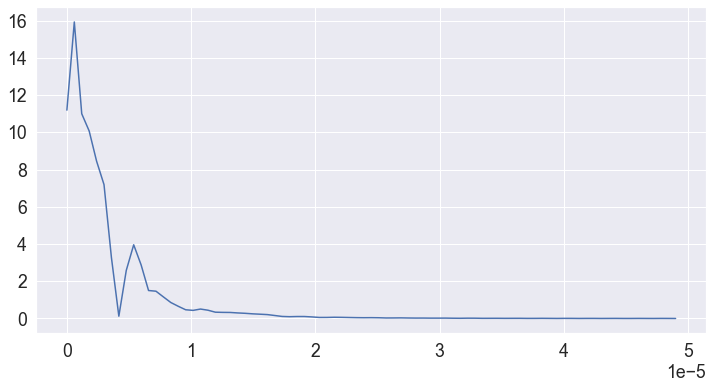

In [123]:
X = np.fft.fft(x_2)
N = len(X)
n = np.arange(N)

sr = 1 / ((60) *167)
T = N/sr
freq = n/T

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

plt.figure(figsize = (12, 6))
plt.plot(f_oneside, np.abs(X[:n_oneside]), 'b')
print(freq[np.argmax(X)])

# t_h = 1/f_oneside / (60)
# plt.plot(t_h, np.abs(X[:n_oneside]), 'b')

In [124]:
def apply_fft(serie):
    # Returna a frequencia maxima na serie
    fft = np.fft.fft(serie)
    fft = np.real(fft)
    
    sr = 1 / ((60) *167)
    T = N/sr
    freq = n/T
    max_freq_amplit = freq[np.argmax(fft)]

    return max_freq_amplit

In [125]:
df["fft"] = df[range(0, 167)].apply(apply_fft, axis=1)
df["fft"]

0        1.792822e-06
1        9.800758e-05
2        1.792822e-06
3        1.792822e-06
4        1.792822e-06
             ...     
13675    9.920279e-05
13676    9.920279e-05
13677    5.976072e-07
13678    5.976072e-07
13679    9.920279e-05
Name: fft, Length: 13680, dtype: float64

<AxesSubplot:xlabel='type', ylabel='fft'>

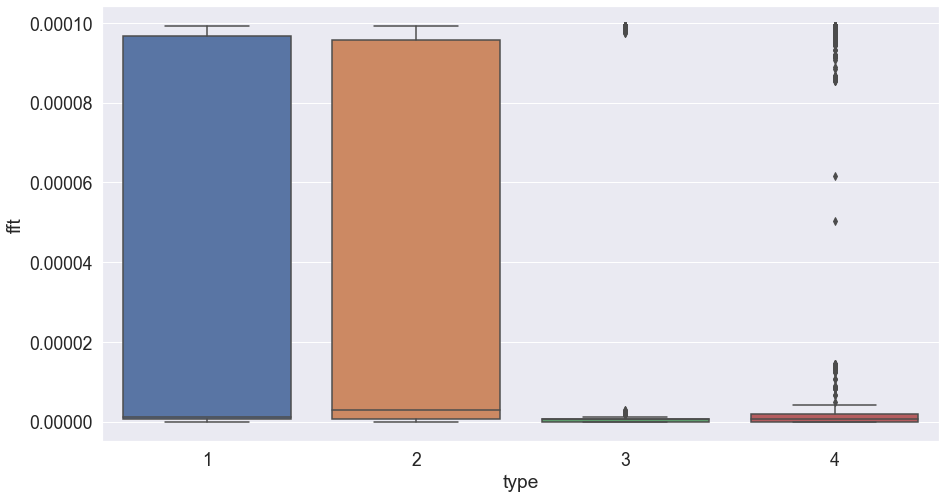

In [126]:
sns.boxplot(data=df[["fft", "type"]], x= "type", y="fft")

## Modeling

Separa as features que serao usadas

In [127]:
train_df = df.copy()

In [128]:
features = ["mean", "median", "std", "max", "min", "fft"]
target = "type"

train_df = train_df[features + [target]]
train_df.head()

,mean,median,std,max,min,fft,type
0,-0.026085,0.007067,1.007300,1.9538,-2.1067,0.000002,1
1,-0.080105,-0.005198,0.695987,1.3579,-1.8534,0.000098,1
2,-0.070121,0.006015,0.731560,1.4258,-1.8871,0.000002,1
3,-0.057267,0.011908,0.786521,1.5387,-1.9270,0.000002,1
4,-0.045168,0.004078,0.863141,1.6771,-1.9822,0.000002,1


**Correlacao**

Para um problema binario talvez nao faça sentido medir a correlacao. Pois a correlacao eh uma metrica que indica que quando uma variavel aumenta a outra aumenta tambem. Para esse problema

In [129]:
# train_df.corr()["location"]

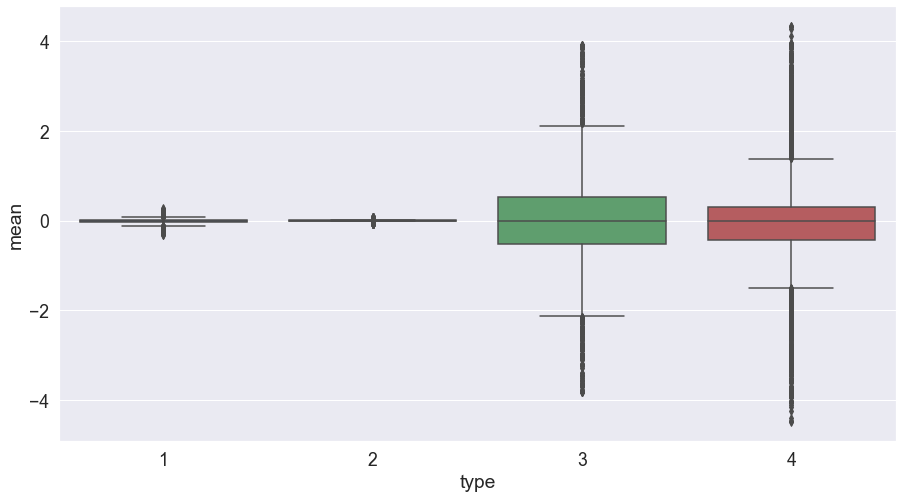

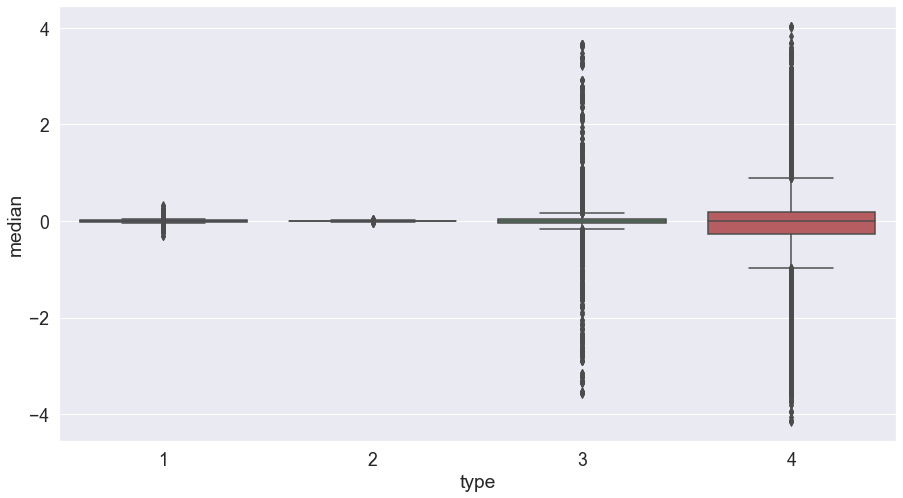

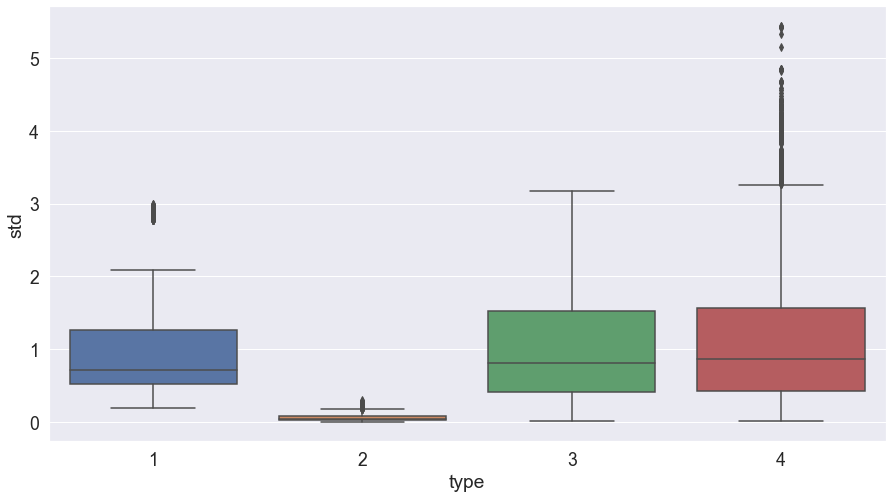

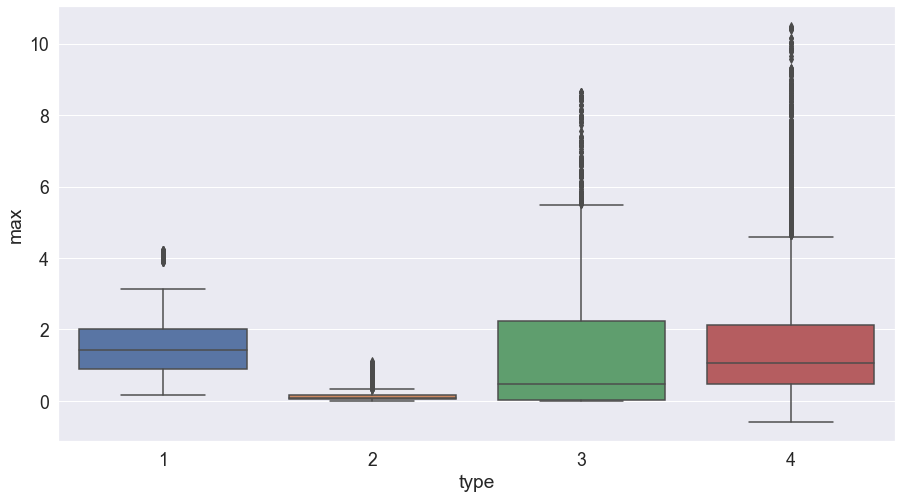

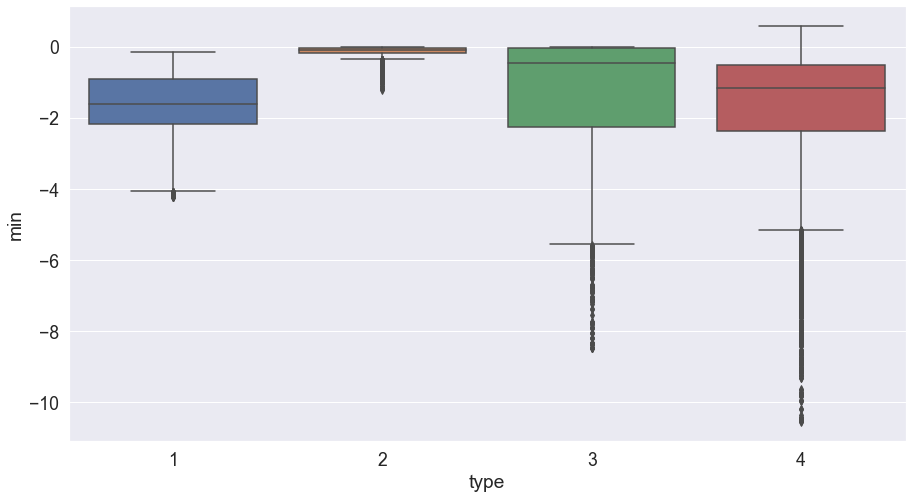

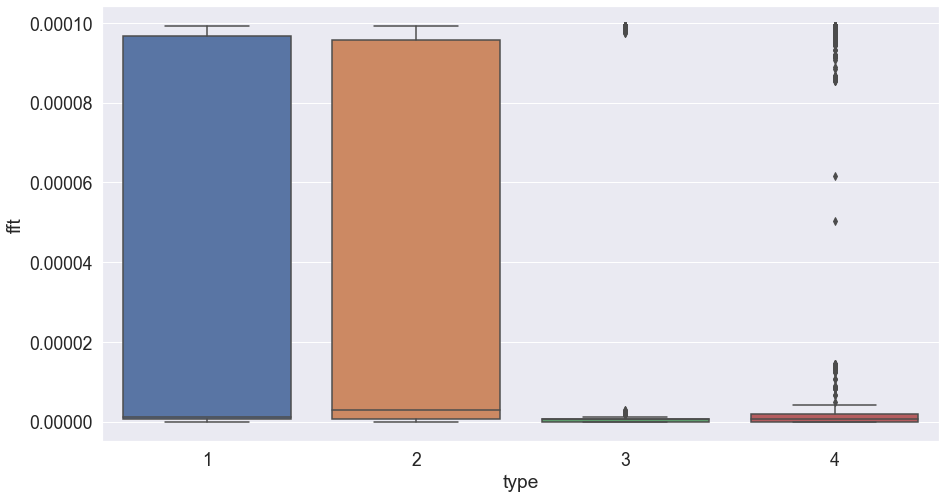

In [130]:
for column in train_df.columns:
    if column != target:
        ax, _ = plt.subplots()
        ax = sns.boxplot(x=target, y=column, data=train_df)

pradroniza as variaveis para o modelo

In [131]:
from sklearn.preprocessing import StandardScaler

In [132]:
sc = StandardScaler()
train_df[features] = sc.fit_transform(train_df[features])
train_df

,mean,median,std,max,min,fft,type
0,-0.001850,0.035057,0.107542,0.377140,-0.407477,-0.510295,1
1,-0.060998,0.019258,-0.239654,0.022076,-0.261411,1.859033,1
2,-0.050067,0.033702,-0.199980,0.062534,-0.280844,-0.510295,1
3,-0.035993,0.041292,-0.138685,0.129805,-0.303852,-0.510295,1
4,-0.022744,0.031207,-0.053233,0.212269,-0.335683,-0.510295,1
...,...,...,...,...,...,...,...
13675,-0.707397,-0.699868,0.209477,-0.296289,-0.531284,1.888465,4
13676,-0.174788,-0.195493,-0.762636,-0.706301,0.504776,1.888465,4
13677,-0.315636,-0.334748,-0.509422,-0.593663,0.234297,-0.539727,4
13678,-0.465926,-0.487489,-0.257936,-0.490826,-0.039457,-0.539727,4


In [133]:
train_df.sample()

,mean,median,std,max,min,fft,type
10725,2.416403,2.620409,1.338981,2.412542,0.141208,-0.554444,4


**Pepara o conjunto para os algoritmos**

In [134]:
train_df.head()

,mean,median,std,max,min,fft,type
0,-0.001850,0.035057,0.107542,0.377140,-0.407477,-0.510295,1
1,-0.060998,0.019258,-0.239654,0.022076,-0.261411,1.859033,1
2,-0.050067,0.033702,-0.199980,0.062534,-0.280844,-0.510295,1
3,-0.035993,0.041292,-0.138685,0.129805,-0.303852,-0.510295,1
4,-0.022744,0.031207,-0.053233,0.212269,-0.335683,-0.510295,1


In [135]:
# Separe Dataset
test_size=0.2

features = train_df.drop(columns=target)
target_values = train_df[target]

In [136]:
# Make the categorical encoding matriz to vector in keras - one hot encoding matrix on keras
# https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical
target_values = utils.to_categorical(target_values)
target_values

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [137]:
# Train and Validation set

# Deprecates: Using train_test_split
# num_val_samples = int(len(features) * 0.2)
# train_features = features[:-num_val_samples]
# train_target = target[:-num_val_samples]
# val_features = features[-num_val_samples:]
# val_target = target[-num_val_samples:]


train_features, val_features, train_target, val_target = train_test_split(features, target_values, test_size=test_size)

print("Number of traning samples", len(train_features))
print("Number of validation samples", len(val_features))
print("Number of features", train_features.shape[1], train_features.columns)

Number of traning samples 10944
Number of validation samples 2736
Number of features 6 Index(['mean', 'median', 'std', 'max', 'min', 'fft'], dtype='object')


## Train

**Tensor Flow**

In [138]:
# Installing Tensorflow
# import sys
# !{sys.executable} -m pip install tensorflow
from tensorflow import keras
from keras.callbacks import History 

In [139]:
train_features

,mean,median,std,max,min,fft
4825,-0.406344,0.019207,-0.280331,-0.776168,-0.310022,1.888465
1352,0.039622,0.023914,-0.951151,-0.593699,0.785438,1.829600
1486,0.068367,0.016435,-0.905306,-0.562101,0.789895,-0.554444
5875,-1.000581,-1.260866,-0.088765,-0.648290,-0.487401,1.888465
3029,0.024141,0.022902,-0.986256,-0.756105,0.783661,1.814884
...,...,...,...,...,...,...
284,0.247580,-0.080989,-0.086366,0.526935,0.361628,-0.554444
11243,0.135945,-0.306037,0.728439,0.832424,-0.161188,-0.554444
13181,0.058355,0.046777,-0.799157,-0.587627,0.660720,-0.554444
12504,0.243708,0.178952,-0.049006,0.156916,0.239631,-0.554444


In [140]:
# Prepare train and validation set - Tensorflow needs arrays
train_features, val_features = train_features.values, val_features.values
# train_target, val_target = train_target.values.reshape(-1, 1), val_target.values.reshape(-1, 1)

In [141]:
# analyze class imbalance
# Tensor flow v.2 need v.1 compatible import to run tf.Session()
# Cant desable v2 behaver, because creation metrics need
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()



# count_label = tf.reduce_sum(train_target, axis=0)
# sess = tf.Session()
# # print dispersao conjunto de treino
# count = sess.run(count_label)
# perc = [c/sum(count) for c in count]
# print(perc)
# # print dispersao conjunto de teste
# count_label = tf.reduce_sum(val_target, axis=0)
# count = sess.run(count_label)
# perc = [c/sum(count) for c in count]
# print(perc)

In [142]:
# Normalize the data using traning set statistics

mean = np.mean(train_features, axis=0)
train_features -= mean
val_features -= mean
std = np.std(train_features, axis=0)
train_features /= std
val_features /= std

print("train_features", train_features)
print("val_features", val_features)
print("train_target", train_target)
print("val_target", val_target)

train_features [[-0.40179225  0.0217684  -0.28075563 -0.77324933 -0.30578988  1.89785641]
 [ 0.04133344  0.02644336 -0.94783815 -0.59133205  0.78130441  1.83882505]
 [ 0.06989462  0.01901427 -0.90224865 -0.55983006  0.78572732 -0.55194513]
 ...
 [ 0.05994659  0.04915285 -0.79669114 -0.58527877  0.65753907 -0.55194513]
 [ 0.24411888  0.18044171 -0.05071894  0.15701091  0.239666   -0.55194513]
 [-0.30591259  0.04320728  0.25212241 -0.12254471 -0.85165777 -0.52242944]]
val_features [[-1.17865335e+00 -1.24017607e+00  3.78572126e-01 -3.93647134e-01
  -9.15005688e-01 -5.37187285e-01]
 [ 2.86358303e-02  3.13326304e-02 -9.91649402e-01 -7.58598502e-01
   7.82876951e-01 -5.37187285e-01]
 [ 6.44146564e-01  7.42424672e-01 -3.64733725e-01  8.80427637e-02
   6.88932622e-01 -5.51945125e-01]
 ...
 [ 9.84294534e-02  1.62478321e-01  2.11372426e+00  1.59108490e+00
  -1.45875627e+00 -5.51945125e-01]
 [-2.98883147e-02 -7.21780951e-02 -3.16381462e-03  7.78163942e-04
  -4.38045845e-04  1.89785641e+00]
 [-1.9

In [143]:
# Criacao do modelo no Keras
# Camada Densa: foram criadas camadas densas. As camadas densas sao camadas totalmente conectadas. Ou seja, todos os neuronios
# de uma camada se conectam com todos os neuronios das camadas seguintes
# Dropout: o dropout eh uma tecnica de regularizacao utilizada para reduzir o sobreajuste em redes neurais
units = 256
output_shape = 5
model = keras.Sequential(

    [
        keras.layers.Dense(
            units, activation="relu", input_shape=(train_features.shape[-1] ,)
        ),
        keras.layers.Dense(units, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(units, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(output_shape, activation="softmax")
    ]
)

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 256)               1792      
                                                                 
 dense_25 (Dense)            (None, 256)               65792     
                                                                 
 dropout_12 (Dropout)        (None, 256)               0         
                                                                 
 dense_26 (Dense)            (None, 256)               65792     
                                                                 
 dropout_13 (Dropout)        (None, 256)               0         
                                                                 
 dense_27 (Dense)            (None, 5)                 1285      
                                                                 
Total params: 134,661
Trainable params: 134,661
Non-tr

In [144]:
# Criando Metricas - para o treinamento do modelo
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

# Keras dont have build-in f1 score, have to be created
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

**Treinando com uma funcao de RMSE**

Na teoria da informacao a entropia cruzada se refere à diferença entre duas distribuições de probabilidade p (verdadeira) e q (estimada) sobre o mesmo conjunto de eventos. Na prática a entropia cruzada mede o número de bits necessários para identificar um evento.


In [145]:
metrics = [
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
    keras.metrics.BinaryAccuracy(name="accuracy"),
    f1_m
]

model.compile(optimizer=tf.keras.optimizers.Adam(1e-2), loss="MeanSquaredError", metrics=metrics)

model.fit(
    train_features,
    train_target,
    batch_size=2048,
    epochs=40,
    verbose=2,
    validation_data=(val_features, val_target)
)

Epoch 1/40
6/6 - 2s - loss: 0.1169 - fn: 6514.0000 - fp: 2140.0000 - tn: 41636.0000 - tp: 4430.0000 - precision: 0.6743 - recall: 0.4048 - accuracy: 0.8418 - f1_m: 0.4898 - val_loss: 0.1210 - val_fn: 1026.0000 - val_fp: 1020.0000 - val_tn: 9924.0000 - val_tp: 1710.0000 - val_precision: 0.6264 - val_recall: 0.6250 - val_accuracy: 0.8504 - val_f1_m: 0.6269 - 2s/epoch - 384ms/step
Epoch 2/40
6/6 - 0s - loss: 0.1025 - fn: 3956.0000 - fp: 3411.0000 - tn: 40365.0000 - tp: 6988.0000 - precision: 0.6720 - recall: 0.6385 - accuracy: 0.8654 - f1_m: 0.6618 - val_loss: 0.0913 - val_fn: 889.0000 - val_fp: 745.0000 - val_tn: 10199.0000 - val_tp: 1847.0000 - val_precision: 0.7126 - val_recall: 0.6751 - val_accuracy: 0.8806 - val_f1_m: 0.7004 - 220ms/epoch - 37ms/step
Epoch 3/40
6/6 - 0s - loss: 0.0892 - fn: 3958.0000 - fp: 2363.0000 - tn: 41413.0000 - tp: 6986.0000 - precision: 0.7472 - recall: 0.6383 - accuracy: 0.8845 - f1_m: 0.6869 - val_loss: 0.0809 - val_fn: 1024.0000 - val_fp: 352.0000 - val_tn

Epoch 23/40
6/6 - 0s - loss: 0.0324 - fn: 1283.0000 - fp: 963.0000 - tn: 42813.0000 - tp: 9661.0000 - precision: 0.9094 - recall: 0.8828 - accuracy: 0.9590 - f1_m: 0.8968 - val_loss: 0.0370 - val_fn: 397.0000 - val_fp: 285.0000 - val_tn: 10659.0000 - val_tp: 2339.0000 - val_precision: 0.8914 - val_recall: 0.8549 - val_accuracy: 0.9501 - val_f1_m: 0.8759 - 204ms/epoch - 34ms/step
Epoch 24/40
6/6 - 0s - loss: 0.0337 - fn: 1291.0000 - fp: 1014.0000 - tn: 42762.0000 - tp: 9653.0000 - precision: 0.9049 - recall: 0.8820 - accuracy: 0.9579 - f1_m: 0.8940 - val_loss: 0.0335 - val_fn: 319.0000 - val_fp: 268.0000 - val_tn: 10676.0000 - val_tp: 2417.0000 - val_precision: 0.9002 - val_recall: 0.8834 - val_accuracy: 0.9571 - val_f1_m: 0.8932 - 180ms/epoch - 30ms/step
Epoch 25/40
6/6 - 0s - loss: 0.0304 - fn: 1188.0000 - fp: 914.0000 - tn: 42862.0000 - tp: 9756.0000 - precision: 0.9143 - recall: 0.8914 - accuracy: 0.9616 - f1_m: 0.9034 - val_loss: 0.0371 - val_fn: 353.0000 - val_fp: 287.0000 - val_t

Text(0, 0.5, 'Métrica de Performance')

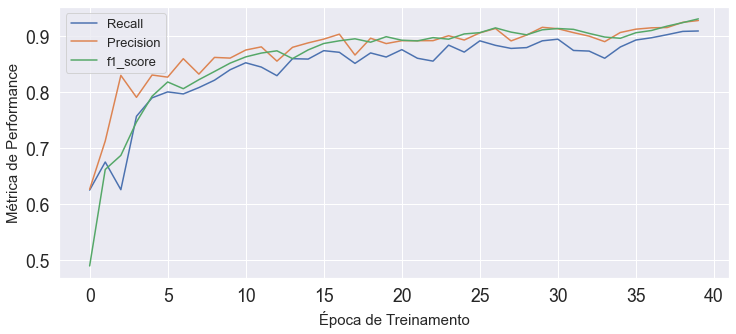

In [146]:
plt.figure(figsize=(12, 5))
plt.plot(model.history.history["val_recall"])
plt.plot(model.history.history["val_precision"])
plt.plot(model.history.history["f1_m"])
plt.legend(["Recall", "Precision", "f1_score"],fontsize=13)
plt.xlabel("Época de Treinamento", fontsize=15)
plt.ylabel("Métrica de Performance", fontsize=15)

In [147]:
# Confusion Matrix

In [148]:
# Keras use 0.5 as threshold
# The reason is that predict method itself returns the probability of membership of the input to each class. 
# If the last layer is softmax then the probability which is used would be mutually exclusive membership
y_pred = model.predict(val_features)
y_pred = y_pred.argmax(axis=1)
np.unique(y_pred, return_counts=True)
y_pred

array([4, 2, 4, ..., 1, 4, 3], dtype=int64)

superexcitação 0.9619883040935673 0.6730769230769231 0.6645569620253164 0.6687898089171974
magntetização inrush 0.9853801169590644 0.9415322580645161 0.9769874476987448 0.9589322381930184
inrush simpático 0.9528508771929824 0.9471153846153846 0.7864271457085829 0.8593238822246456
faltas externas 0.9331140350877193 0.9244604316546763 0.9643527204502814 0.9439853076216712


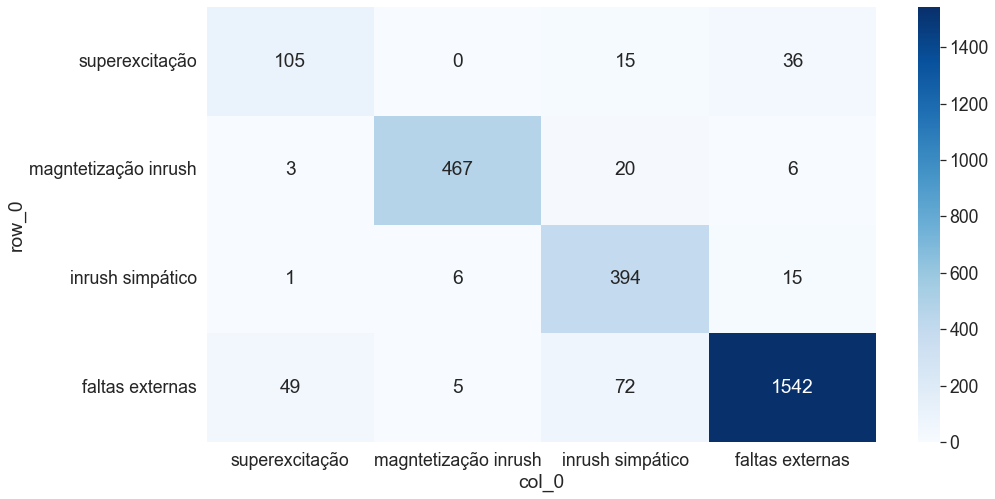

In [149]:
# https://www.youtube.com/watch?v=zqJLLaDd4QQ&t=551s
confusion_df = pd.crosstab(y_pred, val_target.argmax(axis=1)).rename(columns=faults_type_dic, index=faults_type_dic)
sns.heatmap(confusion_df, annot=True, cmap='Blues', fmt='g')
for i in range(confusion_df.shape[0]):
    TP = confusion_df.iloc[i,i]
    FP = confusion_df.iloc[i, :].sum() - TP
    FN = confusion_df.iloc[:, i].sum() - TP
    TN = confusion_df.sum().sum() - TP -FP - FN
    Accuracy = (TP+TN)/confusion_df.sum().sum()
    Precision = TP/(TP+FP)
    Recall = TP/(TP+FN)
    F1_Score = (2*Precision*Recall)/(Precision+Recall)
    print(confusion_df.index[i], Accuracy, Precision, Recall, F1_Score)

In [150]:
pd.DataFrame(classification_report(y_pred, val_target.argmax(axis=1), output_dict=True))

,1,2,3,4,accuracy,macro avg,weighted avg
precision,0.664557,0.976987,0.786427,0.964353,0.916667,0.848081,0.922497
recall,0.673077,0.941532,0.947115,0.924460,0.916667,0.871546,0.916667
f1-score,0.668790,0.958932,0.859324,0.943985,0.916667,0.857758,0.918132
support,156.000000,496.000000,416.000000,1668.000000,0.916667,2736.000000,2736.000000


**Treinando com uma funcao de loss de crossentropia**

Na teoria da informacao a entropia cruzada se refere à diferença entre duas distribuições de probabilidade p (verdadeira) e q (estimada) sobre o mesmo conjunto de eventos. Na prática a entropia cruzada mede o número de bits necessários para identificar um evento.


In [151]:
# Treinando com uma funcao de loss de crossentropia
metrics = [
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
    keras.metrics.BinaryAccuracy(name="accuracy"),
    f1_m
]

model.compile(optimizer=tf.keras.optimizers.Adam(1e-2), loss="categorical_crossentropy", metrics=metrics)

crooss_model = model.fit(
    train_features,
    train_target,
    batch_size=2048,
    epochs=40,
    verbose=2,
    validation_data=(val_features, val_target)
)

Epoch 1/40
6/6 - 3s - loss: 0.6813 - fn: 2088.0000 - fp: 1650.0000 - tn: 42126.0000 - tp: 8856.0000 - precision: 0.8429 - recall: 0.8092 - accuracy: 0.9317 - f1_m: 0.8291 - val_loss: 0.4900 - val_fn: 543.0000 - val_fp: 372.0000 - val_tn: 10572.0000 - val_tp: 2193.0000 - val_precision: 0.8550 - val_recall: 0.8015 - val_accuracy: 0.9331 - val_f1_m: 0.8346 - 3s/epoch - 443ms/step
Epoch 2/40
6/6 - 0s - loss: 0.4518 - fn: 1959.0000 - fp: 1227.0000 - tn: 42549.0000 - tp: 8985.0000 - precision: 0.8798 - recall: 0.8210 - accuracy: 0.9418 - f1_m: 0.8531 - val_loss: 0.3926 - val_fn: 419.0000 - val_fp: 288.0000 - val_tn: 10656.0000 - val_tp: 2317.0000 - val_precision: 0.8894 - val_recall: 0.8469 - val_accuracy: 0.9483 - val_f1_m: 0.8794 - 199ms/epoch - 33ms/step
Epoch 3/40
6/6 - 0s - loss: 0.3724 - fn: 1536.0000 - fp: 1145.0000 - tn: 42631.0000 - tp: 9408.0000 - precision: 0.8915 - recall: 0.8596 - accuracy: 0.9510 - f1_m: 0.8747 - val_loss: 0.3417 - val_fn: 358.0000 - val_fp: 284.0000 - val_tn: 

Epoch 23/40
6/6 - 0s - loss: 0.1701 - fn: 756.0000 - fp: 574.0000 - tn: 43202.0000 - tp: 10188.0000 - precision: 0.9467 - recall: 0.9309 - accuracy: 0.9757 - f1_m: 0.9396 - val_loss: 0.1945 - val_fn: 222.0000 - val_fp: 187.0000 - val_tn: 10757.0000 - val_tp: 2514.0000 - val_precision: 0.9308 - val_recall: 0.9189 - val_accuracy: 0.9701 - val_f1_m: 0.9305 - 185ms/epoch - 31ms/step
Epoch 24/40
6/6 - 0s - loss: 0.1667 - fn: 716.0000 - fp: 591.0000 - tn: 43185.0000 - tp: 10228.0000 - precision: 0.9454 - recall: 0.9346 - accuracy: 0.9761 - f1_m: 0.9377 - val_loss: 0.1886 - val_fn: 209.0000 - val_fp: 164.0000 - val_tn: 10780.0000 - val_tp: 2527.0000 - val_precision: 0.9391 - val_recall: 0.9236 - val_accuracy: 0.9727 - val_f1_m: 0.9334 - 204ms/epoch - 34ms/step
Epoch 25/40
6/6 - 0s - loss: 0.1668 - fn: 708.0000 - fp: 547.0000 - tn: 43229.0000 - tp: 10236.0000 - precision: 0.9493 - recall: 0.9353 - accuracy: 0.9771 - f1_m: 0.9431 - val_loss: 0.1971 - val_fn: 234.0000 - val_fp: 182.0000 - val_tn

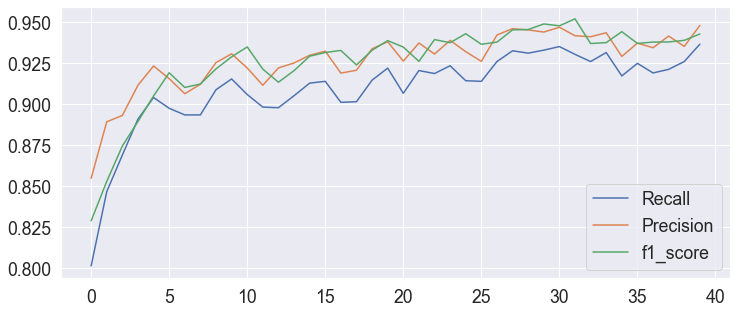

In [152]:
plt.figure(figsize=(12, 5))
plt.plot(model.history.history["val_recall"])
plt.plot(model.history.history["val_precision"])
plt.plot(model.history.history["f1_m"])
plt.legend(["Recall", "Precision", "f1_score"])

In [153]:
# Confusion Matrix

In [154]:
# Keras use 0.5 as threshold
# The reason is that predict method itself returns the probability of membership of the input to each class. 
# If the last layer is softmax then the probability which is used would be mutually exclusive membership
y_pred = model.predict(val_features)
y_pred = y_pred.argmax(axis=1)
np.unique(y_pred, return_counts=True)
y_pred

array([4, 2, 4, ..., 1, 4, 3], dtype=int64)

In [155]:
sns.set(font_scale=1.6)

superexcitação 0.9784356725146199 0.8235294117647058 0.7974683544303798 0.8102893890675241
magntetização inrush 0.9883040935672515 0.9424603174603174 0.9937238493723849 0.9674134419551935
inrush simpático 0.9630847953216374 0.9405286343612335 0.8522954091816367 0.8942408376963351
faltas externas 0.9539473684210527 0.9532307692307692 0.9687304565353346 0.9609181141439206


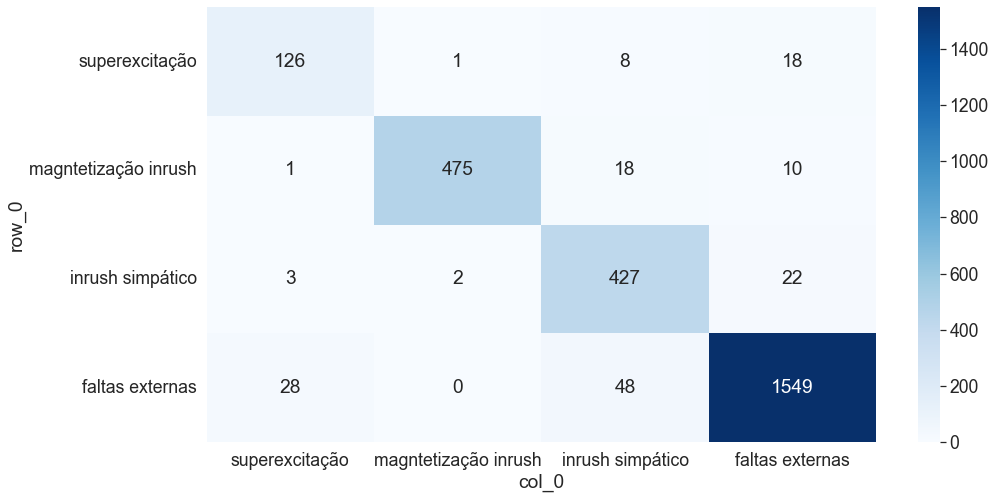

In [156]:
# https://www.youtube.com/watch?v=zqJLLaDd4QQ&t=551s
confusion_df = pd.crosstab(y_pred, val_target.argmax(axis=1)).rename(columns=faults_type_dic, index=faults_type_dic)
sns.heatmap(confusion_df, annot=True, cmap='Blues', fmt='g')
for i in range(confusion_df.shape[0]):
    TP = confusion_df.iloc[i,i]
    FP = confusion_df.iloc[i, :].sum() - TP
    FN = confusion_df.iloc[:, i].sum() - TP
    TN = confusion_df.sum().sum() - TP -FP - FN
    Accuracy = (TP+TN)/confusion_df.sum().sum()
    Precision = TP/(TP+FP)
    Recall = TP/(TP+FN)
    F1_Score = (2*Precision*Recall)/(Precision+Recall)
    print(confusion_df.index[i], Accuracy, Precision, Recall, F1_Score)

**Treinando com uma funcao de loss de KDL**

In [158]:
# Treinando com uma funcao de loss de crossentropia
metrics = [
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
    keras.metrics.BinaryAccuracy(name="accuracy"),
    f1_m
]

model.compile(optimizer=tf.keras.optimizers.Adam(1e-2), loss="KLDivergence", metrics=metrics)

model.fit(
    train_features,
    train_target,
    batch_size=2048,
    epochs=40,
    verbose=2,
    validation_data=(val_features, val_target)
)

Epoch 1/40
6/6 - 3s - loss: 0.8462 - fn: 2161.0000 - fp: 1914.0000 - tn: 41862.0000 - tp: 8783.0000 - precision: 0.8211 - recall: 0.8025 - accuracy: 0.9255 - f1_m: 0.8148 - val_loss: 0.6508 - val_fn: 506.0000 - val_fp: 436.0000 - val_tn: 10508.0000 - val_tp: 2230.0000 - val_precision: 0.8365 - val_recall: 0.8151 - val_accuracy: 0.9311 - val_f1_m: 0.8344 - 3s/epoch - 419ms/step
Epoch 2/40
6/6 - 0s - loss: 0.4763 - fn: 2033.0000 - fp: 1337.0000 - tn: 42439.0000 - tp: 8911.0000 - precision: 0.8695 - recall: 0.8142 - accuracy: 0.9384 - f1_m: 0.8419 - val_loss: 0.3571 - val_fn: 357.0000 - val_fp: 234.0000 - val_tn: 10710.0000 - val_tp: 2379.0000 - val_precision: 0.9104 - val_recall: 0.8695 - val_accuracy: 0.9568 - val_f1_m: 0.8933 - 180ms/epoch - 30ms/step
Epoch 3/40
6/6 - 0s - loss: 0.3565 - fn: 1537.0000 - fp: 1005.0000 - tn: 42771.0000 - tp: 9407.0000 - precision: 0.9035 - recall: 0.8596 - accuracy: 0.9535 - f1_m: 0.8813 - val_loss: 0.3497 - val_fn: 376.0000 - val_fp: 295.0000 - val_tn: 

Epoch 23/40
6/6 - 0s - loss: 0.1487 - fn: 680.0000 - fp: 528.0000 - tn: 43248.0000 - tp: 10264.0000 - precision: 0.9511 - recall: 0.9379 - accuracy: 0.9779 - f1_m: 0.9446 - val_loss: 0.1534 - val_fn: 180.0000 - val_fp: 145.0000 - val_tn: 10799.0000 - val_tp: 2556.0000 - val_precision: 0.9463 - val_recall: 0.9342 - val_accuracy: 0.9762 - val_f1_m: 0.9433 - 263ms/epoch - 44ms/step
Epoch 24/40
6/6 - 0s - loss: 0.1463 - fn: 626.0000 - fp: 496.0000 - tn: 43280.0000 - tp: 10318.0000 - precision: 0.9541 - recall: 0.9428 - accuracy: 0.9795 - f1_m: 0.9461 - val_loss: 0.1589 - val_fn: 180.0000 - val_fp: 146.0000 - val_tn: 10798.0000 - val_tp: 2556.0000 - val_precision: 0.9460 - val_recall: 0.9342 - val_accuracy: 0.9762 - val_f1_m: 0.9435 - 267ms/epoch - 45ms/step
Epoch 25/40
6/6 - 0s - loss: 0.1525 - fn: 676.0000 - fp: 539.0000 - tn: 43237.0000 - tp: 10268.0000 - precision: 0.9501 - recall: 0.9382 - accuracy: 0.9778 - f1_m: 0.9438 - val_loss: 0.1775 - val_fn: 206.0000 - val_fp: 162.0000 - val_tn

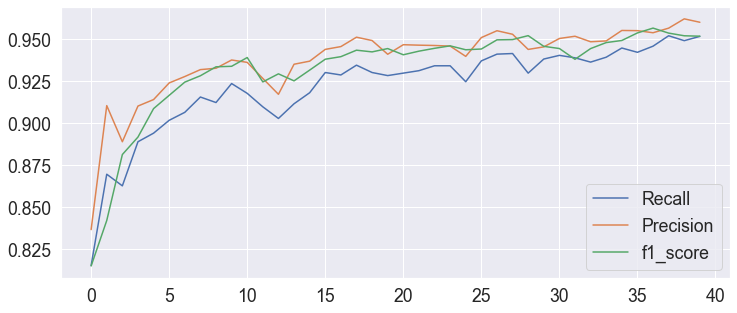

In [159]:
plt.figure(figsize=(12, 5))
plt.plot(model.history.history["val_recall"])
plt.plot(model.history.history["val_precision"])
plt.plot(model.history.history["f1_m"])
plt.legend(["Recall", "Precision", "f1_score"])

In [160]:
# Confusion Matrix

In [161]:
# Keras use 0.5 as threshold
# The reason is that predict method itself returns the probability of membership of the input to each class. 
# If the last layer is softmax then the probability which is used would be mutually exclusive membership
y_pred = model.predict(val_features)
y_pred = y_pred.argmax(axis=1)
np.unique(y_pred, return_counts=True)
y_pred

array([4, 2, 4, ..., 1, 4, 3], dtype=int64)

superexcitação 0.97953216374269 0.8269230769230769 0.8164556962025317 0.8216560509554139
magntetização inrush 0.9897660818713451 0.95 0.9937238493723849 0.9713701431492843
inrush simpático 0.9747807017543859 0.9675324675324676 0.8922155688622755 0.928348909657321
faltas externas 0.9682017543859649 0.9672435105067985 0.9787367104440275 0.9729561703450419


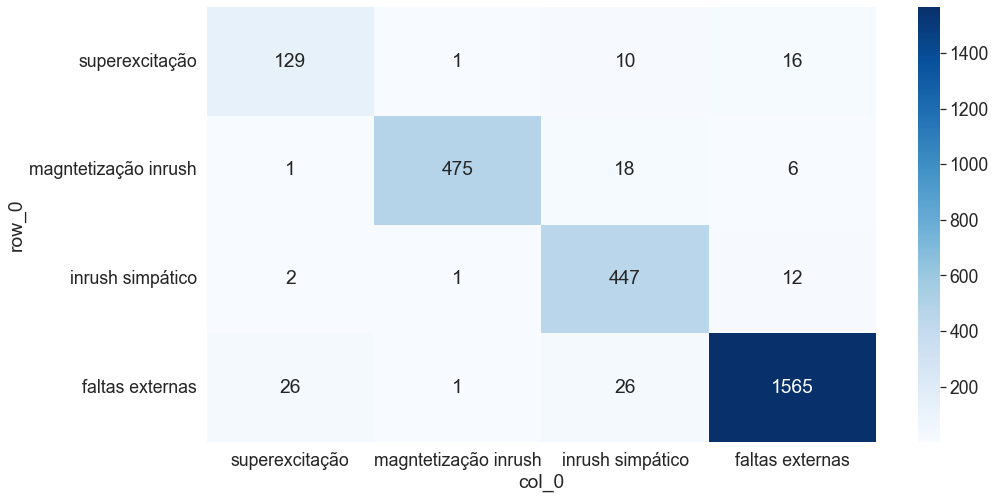

In [162]:
# https://www.youtube.com/watch?v=zqJLLaDd4QQ&t=551s
confusion_df = pd.crosstab(y_pred, val_target.argmax(axis=1)).rename(columns=faults_type_dic, index=faults_type_dic)
sns.heatmap(confusion_df, annot=True, cmap='Blues', fmt='g')
for i in range(confusion_df.shape[0]):
    TP = confusion_df.iloc[i,i]
    FP = confusion_df.iloc[i, :].sum() - TP
    FN = confusion_df.iloc[:, i].sum() - TP
    TN = confusion_df.sum().sum() - TP -FP - FN
    Accuracy = (TP+TN)/confusion_df.sum().sum()
    Precision = TP/(TP+FP)
    Recall = TP/(TP+FN)
    F1_Score = (2*Precision*Recall)/(Precision+Recall)
    print(confusion_df.index[i], Accuracy, Precision, Recall, F1_Score)